# **`Using NLP to Make Early Medical Diagnosis for Symptoms Easier`**

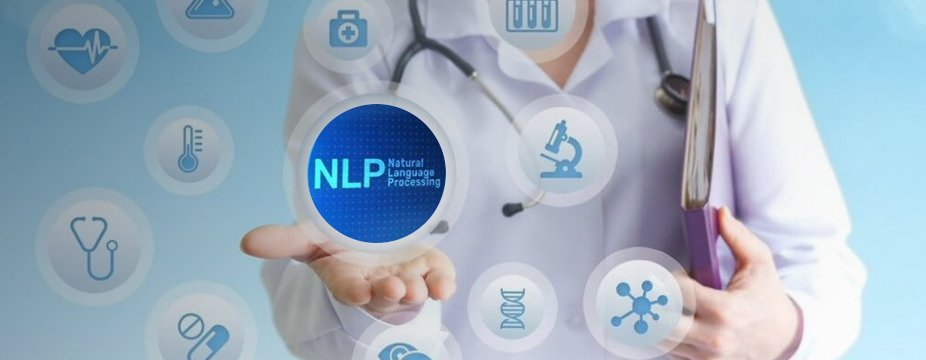

In [ ]:
from PIL import Image

# Charger l'image .jfif
image_jfif = Image.open('/content/data/NLP-in-Healthcare.jfif')

# Enregistrer l'image convertie en .png
image_jfif.save('/content/data/NLP-in-Healthcare.png')

# Afficher l'image convertie
from IPython.display import Image
Image(filename='/content/data/NLP-in-Healthcare.png')


# **Methodology**:

#### **importation des bibliothèques 📚 :**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords


from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from bs4 import BeautifulSoup
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer


#### **Lecture de l'ensemble de données 👓 :**

Le code commence par charger le jeu de données à partir d'un fichier CSV en utilisant la bibliothèque Pandas.
Il affiche les 20 premières lignes du DataFrame pour donner un aperçu initial de la structure des données.


In [ ]:
df = pd.read_csv('/content/data/Symptom2Disease.csv')

# Display the DataFrame
df.head(20)

,Unnamed: 0,label,text
0,0,Psoriasis,"I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches."
1,1,Psoriasis,"My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation."
2,2,Psoriasis,"I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints."
3,3,Psoriasis,"There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them."
4,4,Psoriasis,"My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms."
5,5,Psoriasis,The skin on my palms and soles is thickened and has deep cracks. These cracks are painful and bleed easily.
6,6,Psoriasis,"The skin around my mouth, nose, and eyes is red and inflamed. It is often itchy and uncomfortable. There is a noticeable inflammation in my nails."
7,7,Psoriasis,My skin is very sensitive and reacts easily to changes in temperature or humidity. I often have to be careful about what products I use on my skin.
8,8,Psoriasis,"I have noticed a sudden peeling of skin at different parts of my body, mainly arms, legs and back. Also, I face severe joint pain and skin rashes."
9,9,Psoriasis,"The skin on my genitals is red and inflamed. It is often itchy, burning, and uncomfortable. There are rashes on different parts of the body too."


##### **Description des attributs 🧾 :**
Le jeu de données se compose de 1200 points de données et comporte deux colonnes : "label" et "texte".

- **label :** contient les étiquettes des maladies.
- **texte :** contient les descriptions des symptômes en langage naturel.

####  **Prétraitement et Visualisation des données🔍 :**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1200 non-null   int64 
 1   label       1200 non-null   object
 2   text        1200 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.2+ KB


In [ ]:
#La colonne 'Unnamed: 0' est supprimée car elle semble être une colonne d'index inutile.
df = df.drop('Unnamed: 0', axis=1)

#### **visualisation des données 📊:**

👉  Le prochain bloc de code importe la bibliothèque matplotlib.pyplot et crée un graphique à barres ainsi qu'un graphique circulaire pour visualiser la distribution des libellés dans le DataFrame. Cela nous aide à comprendre la fréquence des différentes catégories de produits dans l'ensemble de données.

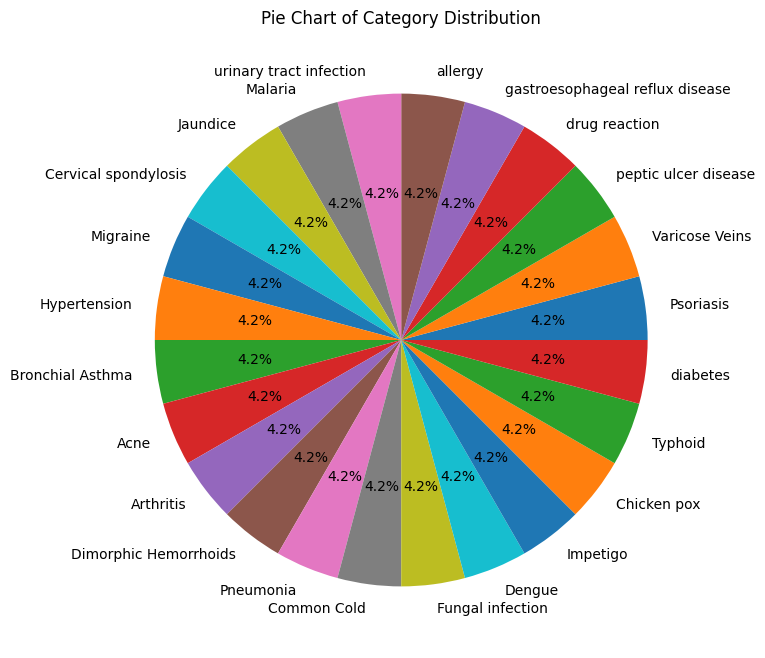

In [ ]:


# Calculer le décompte des valeurs de la colonne 'label'
category_counts = df['label'].value_counts()

# Créer un graphique à secteurs
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Category Distribution')
plt.show()

 👉   **Les données sont équilibrées.**



In [ ]:
df['label'].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [ ]:
len(df['label'].unique())

24

#### **Duplicates and Missing Values:**

 👉 Ensuite, nous évaluerons la taille du jeu de données, identifierons les lignes dupliquées, et traiterons les valeurs manquantes pour assurer l'intégrité de notre analyse.


In [ ]:
# Combien d'avis avons-nous ?
print('Il y a', df.shape[0], 'avis dans cet ensemble de données')

# A-t-on des doublons ?
print('Nombre de doublons :', len(df[df.duplicated()]))

# A-t-on des valeurs manquantes ?
valeurs_manquantes = df.isnull().sum()
print('Nombre de valeurs manquantes par colonne :\n', valeurs_manquantes)

print('Nombre total de valeurs manquantes :', df.isnull().sum().sum())

Il y a 1200 avis dans cet ensemble de données
Nombre de doublons : 47
Nombre de valeurs manquantes par colonne :
 label    0
text     0
dtype: int64
Nombre total de valeurs manquantes : 0


In [ ]:
# Remplacer les chaînes vides par des valeurs manquantes (NaN)
df.replace("", np.nan, inplace=True)

# Calculer le nombre de valeurs manquantes et d'espaces vides par colonne
valeurs_manquantes_vides = df.isnull().sum()
print('Nombre de valeurs manquantes et d\'espaces vides par colonne :\n', valeurs_manquantes_vides)

Nombre de valeurs manquantes et d'espaces vides par colonne :
 label    0
text     0
dtype: int64


Dans ce code, nous détectons les lignes en double dans le DataFrame df en utilisant la fonction duplicated avec keep=False, ce qui marque toutes les occurrences d'un doublon. Nous affichons ensuite les 10 premières paires de doublons pour l'inspection.

In [ ]:
# Tout d'abord, obtenez toutes les lignes en double (keep=False garantit que toutes les duplications sont conservées)
lignes_en_double = df[df.duplicated(keep=False)]

# Ensuite, triez le dataframe sur toutes les colonnes pour garantir que les duplications sont adjacentes
duplications_triees = lignes_en_double.sort_values(by=list(lignes_en_double.columns))

# Maintenant, si nous voulons voir 5 paires de duplications (10 lignes), nous pouvons simplement :
top_5_paires_de_duplications = duplications_triees.head(20)

top_5_paires_de_duplications

,label,text
556,Acne,"A nasty rash has just appeared on my skin. Blackheads and pimples packed with pus are everywhere. Additionally, my skin has been extremely sensitive."
563,Acne,"A nasty rash has just appeared on my skin. Blackheads and pimples packed with pus are everywhere. Additionally, my skin has been extremely sensitive."
560,Acne,"A skin rash with several pus-filled pimples and blackheads has been bothering me lately. Additionally, my skin has been scurring a lot."
580,Acne,"A skin rash with several pus-filled pimples and blackheads has been bothering me lately. Additionally, my skin has been scurring a lot."
569,Acne,I just developed a really nasty rash on my skin. There are tons of blackheads and pimples that are filled with pus. My skin has also been really scurrying.
573,Acne,I just developed a really nasty rash on my skin. There are tons of blackheads and pimples that are filled with pus. My skin has also been really scurrying.
570,Acne,I've been dealing with a really nasty rash on my skin lately. It's covered in blackheads and pimples that are packed with pus. My skin has also been really scurrying.
574,Acne,I've been dealing with a really nasty rash on my skin lately. It's covered in blackheads and pimples that are packed with pus. My skin has also been really scurrying.
524,Arthritis,"I've been experiencing stiffness and weakness in my neck muscles recently. Since my joints have grown, it's hard for me to walk without getting stiff. Additionally, walking has been extremely unco..."
526,Arthritis,"I've been experiencing stiffness and weakness in my neck muscles recently. Since my joints have grown, it's hard for me to walk without getting stiff. Additionally, walking has been extremely unco..."


 Drop Duplicates Après avoir identifié les lignes en double, nous les supprimons du DataFrame. Cela contribue à assurer l'intégrité des données et à éviter les entrées en double dans notre analyse.

In [ ]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


#### **Prétraitement du texte ⚙:**
Le texte des symptômes est prétraité, incluant la tokenisation, la conversion du texte en minuscules, ainsi que la suppression des mots vides et des caractères non alphabétiques.


**La fonction "random_sample_reviews"**sélectionne aléatoirement des échantillons de commentaires en groupant les "labels" par texte et en en choisissant un nombre spécifié d'échantillons pour chaque label, renvoyant ainsi un sous-ensemble représentatif sous forme de DataFrame.

In [ ]:
def random_sample_reviews(df, num_samples):
    # Utiliser groupby sur 'label' puis appliquer la fonction sample à 'text' de chaque groupe
    echantillons = df.groupby('label')['text'].apply(lambda x: x.sample(num_samples))

    # Convertir la série en dataframe et réinitialiser l'index
    echantillons_df = echantillons.reset_index()
    echantillons_df = echantillons.reset_index().drop(columns='level_1')

    return echantillons_df

pd.set_option('display.max_colwidth', 200) # Cela affichera jusqu'à 100 caractères
echantillons = random_sample_reviews(df, num_samples=5)
#echantillons.head(20)

In [ ]:

nltk.download('stopwords', download_dir='/usr/local/share/nltk_data')


[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**stopwords**

In [ ]:
stop = stopwords.words('english')

In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**La lemmatisation**

 fait généralement référence à la réalisation de choses de manière appropriée en utilisant un vocabulaire et une analyse morphologique des mots, visant normalement à ne supprimer que les terminaisons flexionnelles et à renvoyer la forme de base ou le lemme d'un mot, ce qui est appelé la forme de dictionnaire.

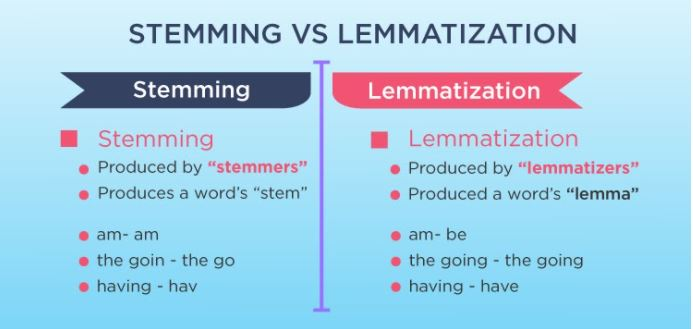

In [ ]:
# Charger l'image
from PIL import Image

img_path = '/content/data/stem.jfif'
img = Image.open(img_path)

# Sauvegarder l'image au format PNG (ou JPG)
img.save('/content/data/stem.png', 'PNG')

# Afficher l'image convertie
from IPython.display import Image
Image(filename='/content/data/stem.png')


In [ ]:
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [ ]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    #3. Tokenization
    from nltk.tokenize import word_tokenize
    words = word_tokenize(letters_only.lower())
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [ ]:
nltk.download('punkt')
nltk.download('wordnet', download_dir='/usr/local/share/nltk_data')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['text1'] = df['text'].apply(review_to_words)

In [ ]:
df.head()

,label,text,text1
0,Psoriasis,"I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.",experiencing skin rash arm leg torso past week red itchy covered dry scaly patch
1,Psoriasis,"My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation.",skin peeling especially knee elbow scalp peeling often accompanied burning stinging sensation
2,Psoriasis,"I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints.",experiencing joint pain finger wrist knee pain often achy throbbing get worse move joint
3,Psoriasis,"There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them.",silver like dusting skin especially lower back scalp dusting made small scale flake easily scratch
4,Psoriasis,"My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms.",nail small dent pit often feel inflammatory tender touch even minor rash arm


#### **Splitting Data 🪓 :**

Le jeu de données est divisé en ensembles d'entraînement et de test, avec 80 % des données utilisées pour entraîner le modèle et 20 % pour évaluer ses performances.

In [ ]:
#Split data into train and test set

X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

## **Text vectorization 🔧 :**

### **1- Extraction de caractéristiques à l'aide de TF-IDF :**
Des vecteurs TF-IDF (Term Frequency-Inverse Document Frequency) sont générés à partir des symptômes prétraités. Cette étape convertit les données textuelles en caractéristiques numériques adaptées aux modèles d'apprentissage automatique.

In [ ]:
# utilise TfidfVectorizer pour convertir les descriptions de symptômes en vecteurs TF-IDF,
#les met à l'échelle avec MinMaxScaler, et ajoute les vecteurs résultants à une nouvelle
# colonne 'vector' dans le DataFrame (df).

tfidf_vectorizer = TfidfVectorizer(max_features=1500)

tfidf_train = tfidf_vectorizer.fit_transform(X_train).toarray()
tfidf_test = tfidf_vectorizer.transform(X_test).toarray()


In [ ]:
# Ajouter les vecteurs TF-IDF à votre DataFrame
df['vector'] = df['text1'].apply(lambda text2: tfidf_vectorizer.transform([text2]).toarray()[0])


In [ ]:
df['label_num']= df.label.map(dict(zip(pd.Series(df['label'].unique()),pd.Series([i for i in range(24)]))))


In [ ]:
df.head(10)

,label,text,text1,vector,label_num
0,Psoriasis,"I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.",experiencing skin rash arm leg torso past week red itchy covered dry scaly patch,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,Psoriasis,"My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation.",skin peeling especially knee elbow scalp peeling often accompanied burning stinging sensation,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21931012337147654, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
2,Psoriasis,"I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints.",experiencing joint pain finger wrist knee pain often achy throbbing get worse move joint,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3657701626149137, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,Psoriasis,"There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them.",silver like dusting skin especially lower back scalp dusting made small scale flake easily scratch,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,Psoriasis,"My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms.",nail small dent pit often feel inflammatory tender touch even minor rash arm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
5,Psoriasis,The skin on my palms and soles is thickened and has deep cracks. These cracks are painful and bleed easily.,skin palm sol thickened deep crack crack painful bleed easily,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
6,Psoriasis,"The skin around my mouth, nose, and eyes is red and inflamed. It is often itchy and uncomfortable. There is a noticeable inflammation in my nails.",skin around mouth nose eye red inflamed often itchy uncomfortable noticeable inflammation nail,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
7,Psoriasis,My skin is very sensitive and reacts easily to changes in temperature or humidity. I often have to be careful about what products I use on my skin.,skin sensitive reacts easily change temperature humidity often careful product use skin,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
8,Psoriasis,"I have noticed a sudden peeling of skin at different parts of my body, mainly arms, legs and back. Also, I face severe joint pain and skin rashes.",noticed sudden peeling skin different part body mainly arm leg back also face severe joint pain skin rash,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

### **Models 🛠 :**

#### **ML model: SVM**

In [ ]:
model = SVC(C=1, kernel='poly', degree=3, gamma="scale")

model.fit(tfidf_train, y_train)

y_pred111 =model.predict(tfidf_train)

y_pred11 = model.predict(tfidf_test)

In [ ]:
SVCAcc1 = accuracy_score(y_train, y_pred111)
SVCAcc1

1.0

In [ ]:
SVCAcc = accuracy_score(y_test, y_pred11)
SVCAcc

0.9567099567099567

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred11))




 Classification Report   :


                                   precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        11
                      Arthritis       1.00      1.00      1.00         6
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        11
                    Chicken pox       0.73      1.00      0.84         8
                    Common Cold       1.00      1.00      1.00        11
                         Dengue       1.00      0.82      0.90        11
          Dimorphic Hemorrhoids       1.00      1.00      1.00         9
               Fungal infection       1.00      1.00      1.00        12
                   Hypertension       1.00      1.00      1.00         9
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00         8
                

**Matrice de Confusion pour y_train**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


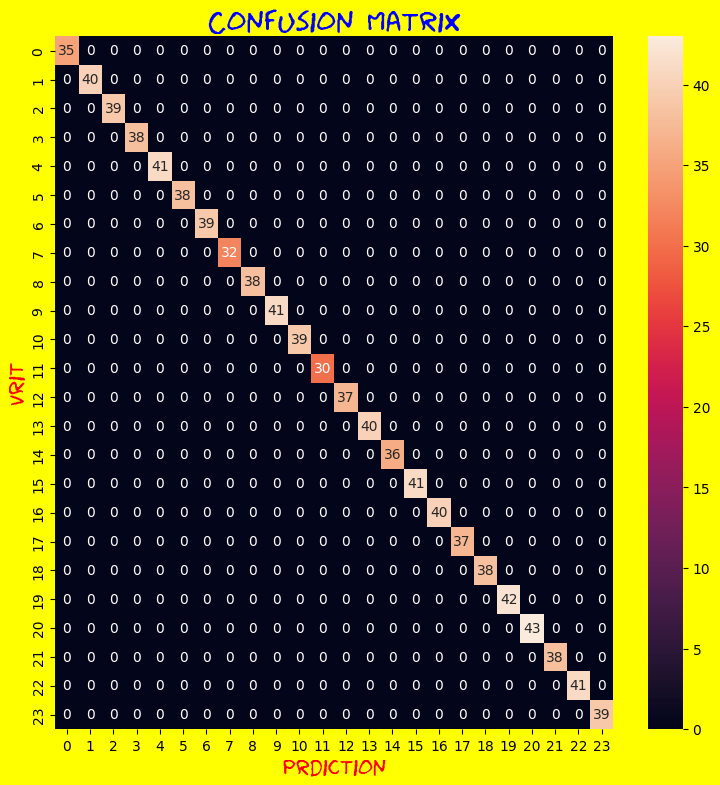

In [ ]:
cm12 = confusion_matrix(y_train , y_pred111)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm12 , annot= True, fmt="d")
plt.xlabel('Prédiction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Vérité', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Matrice de Confusion pour y_test**







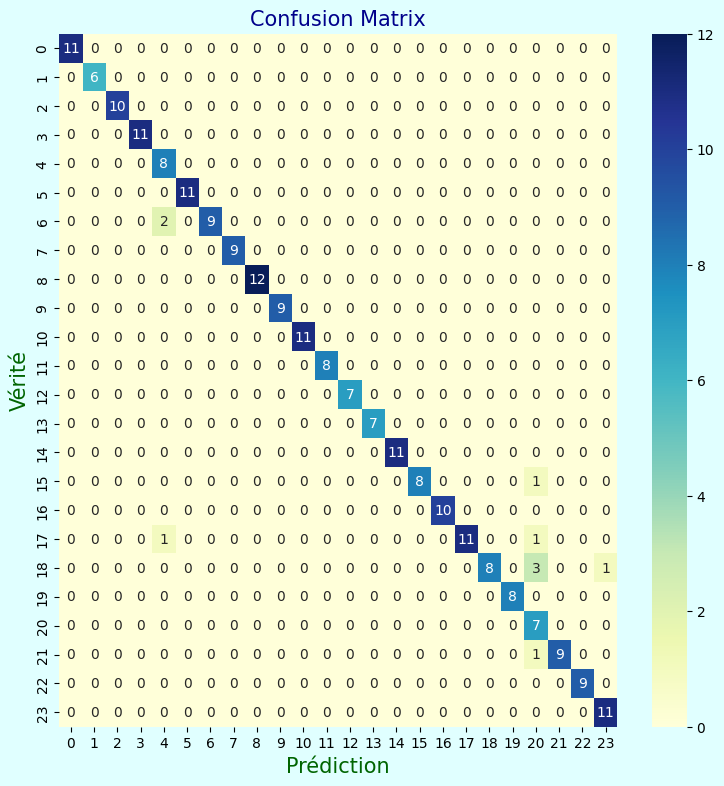

In [ ]:
cm11 = confusion_matrix(y_test, y_pred11)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()


 👉 **Cette fonction `make_pred`** prend un modèle et un texte en entrée, effectue un prétraitement sur le texte, utilise un vecteur TF-IDF pour sa représentation numérique, puis renvoie la prédiction de la maladie. Assurez-vous que les composants nécessaires, tels que la fonction de prétraitement et le vecteur TF-IDF, sont correctement configurés pour obtenir des prédictions fiables.

In [ ]:
def make_pred(model,text):
    """Function to make prediction on single data instance"""
    text = review_to_words(text)
    tfidf = tfidf_vectorizer.transform([text]).toarray()
    disease = model.predict(tfidf)

    return disease[0]
symp1 = "I feel tired all the time, I have lost my taste and have a really sore throat. I also get feverish and often have muscle aches. Sometimes my whole body just cramps up"
make_pred(model,symp1)

'drug reaction'

#### **ML model: KNN**

In [ ]:
# KNN Model Training
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) based on your dataset
knn_classifier.fit(tfidf_train, y_train)

y_pred122 = knn_classifier.predict(tfidf_train)

y_pred12 = knn_classifier.predict(tfidf_test)

In [ ]:
KNNAcc1 = accuracy_score(y_train, y_pred122)
KNNAcc1

0.972885032537961

In [ ]:
KNNAcc = accuracy_score(y_test, y_pred12)
KNNAcc

0.9523809523809523

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred12))




 Classification Report   :


                                   precision    recall  f1-score   support

                           Acne       0.92      1.00      0.96        11
                      Arthritis       1.00      1.00      1.00         6
               Bronchial Asthma       0.83      1.00      0.91        10
           Cervical spondylosis       1.00      1.00      1.00        11
                    Chicken pox       0.80      1.00      0.89         8
                    Common Cold       1.00      0.91      0.95        11
                         Dengue       0.75      0.82      0.78        11
          Dimorphic Hemorrhoids       1.00      1.00      1.00         9
               Fungal infection       1.00      1.00      1.00        12
                   Hypertension       1.00      0.89      0.94         9
                       Impetigo       1.00      0.91      0.95        11
                       Jaundice       0.89      1.00      0.94         8
                

**Matrice de Confusion pour y_train**

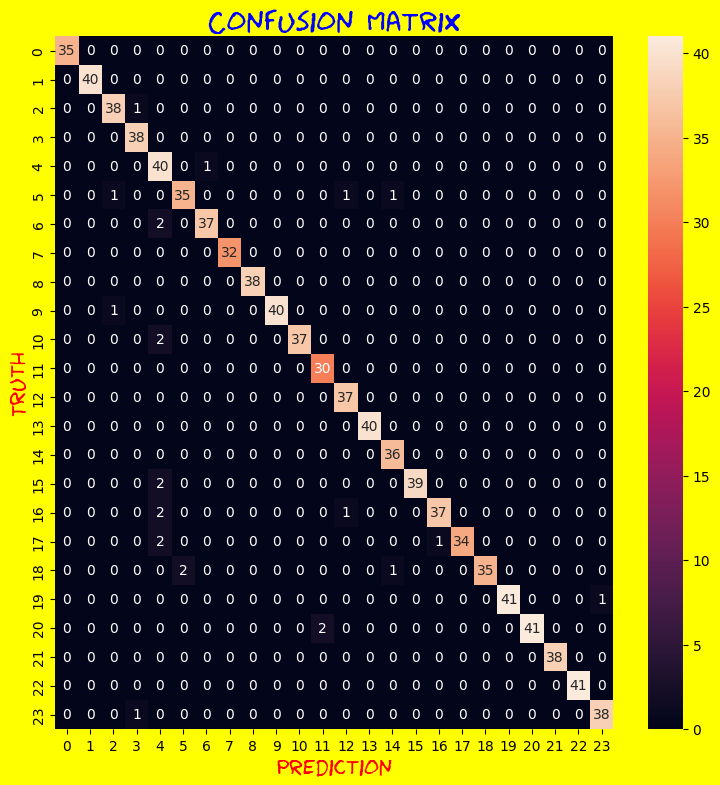

In [ ]:
cm = confusion_matrix(y_train , y_pred122)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()


**Matrice de Confusion pour y_test**

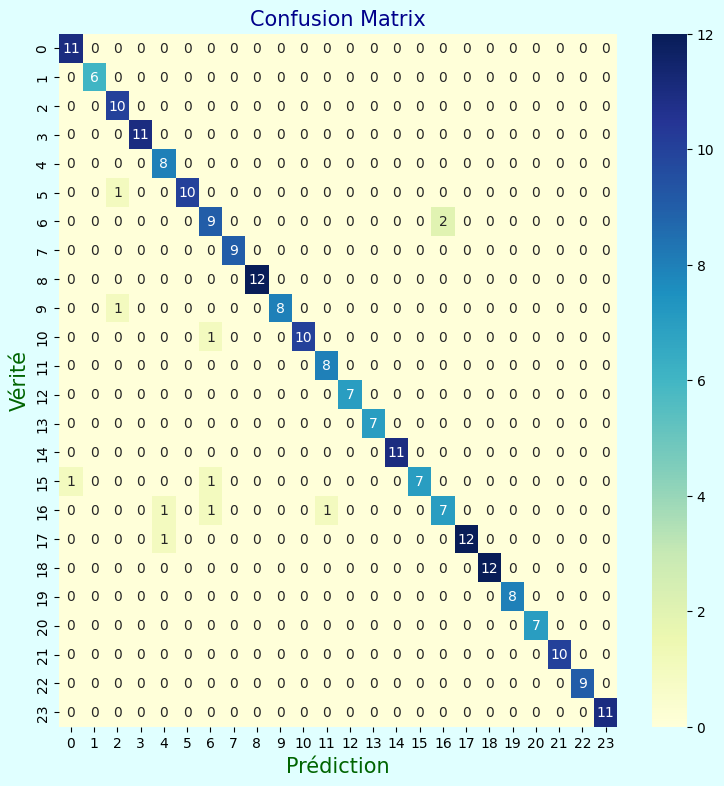

In [ ]:
cm11 = confusion_matrix(y_test, y_pred12)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()

**Fonction make_pred**

In [ ]:
def make_pred(model,text):
    """Function to make prediction on single data instance"""
    text = review_to_words(text)
    tfidf = tfidf_vectorizer.transform([text]).toarray()
    disease = model.predict(tfidf)

    return disease[0]
symp1 = "Yellowing of skin and eyes, fatigue"
make_pred(knn_classifier,symp1)

'Jaundice'

#### **ML model: Arbre de décision**

 **Arbre de décision avec entropy**

In [ ]:
dtc_entropy = DecisionTreeClassifier(criterion='entropy')

# Fit the model
dtc_entropy.fit(tfidf_train, y_train)

# Predictions on training data
y_pred_entropy_train = dtc_entropy.predict(tfidf_train)

# Predictions on test data
y_pred_entropy_test = dtc_entropy.predict(tfidf_test)


In [ ]:
ARDAcc1 = accuracy_score(y_train, y_pred_entropy_train )
ARDAcc1

1.0

In [ ]:
ARDAcc = accuracy_score(y_test, y_pred_entropy_test)
ARDAcc

0.6926406926406926

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred_entropy_test))




 Classification Report   :


                                   precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        11
                      Arthritis       1.00      1.00      1.00         6
               Bronchial Asthma       0.90      0.90      0.90        10
           Cervical spondylosis       1.00      0.91      0.95        11
                    Chicken pox       0.30      0.38      0.33         8
                    Common Cold       0.80      0.73      0.76        11
                         Dengue       0.67      0.36      0.47        11
          Dimorphic Hemorrhoids       1.00      0.89      0.94         9
               Fungal infection       1.00      1.00      1.00        12
                   Hypertension       0.88      0.78      0.82         9
                       Impetigo       0.60      0.82      0.69        11
                       Jaundice       1.00      0.88      0.93         8
                

**Matrice de Confusion pour y_train**

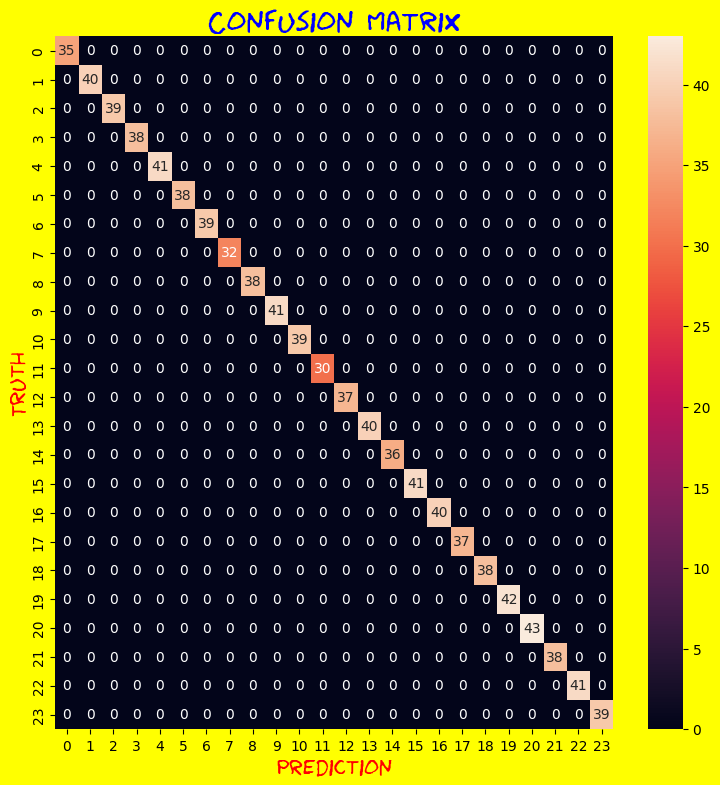

In [ ]:
cm = confusion_matrix(y_train , y_pred_entropy_train)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Matrice de Confusion pour y_test**

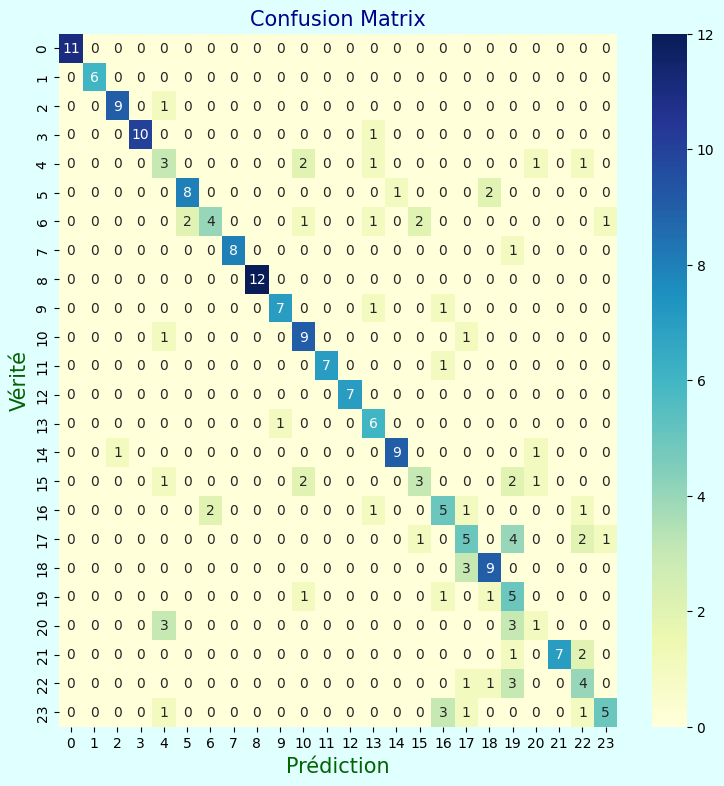

In [ ]:
cm11 = confusion_matrix(y_test, y_pred_entropy_test)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()

**Arbre de décision avec gini d'information**

In [ ]:
dtc_gini = DecisionTreeClassifier(criterion='gini')

# Fit the model
dtc_gini.fit(tfidf_train, y_train)

# Predictions on training data
y_pred_gini_train = dtc_gini.predict(tfidf_train)

# Predictions on test data
y_pred_gini_test = dtc_gini.predict(tfidf_test)


In [ ]:
ARDAcc1 = accuracy_score(y_train, y_pred_gini_train)
ARDAcc1

1.0

In [ ]:
ARDAcc11 = accuracy_score(y_test, y_pred_gini_test)
ARDAcc11

0.8268398268398268

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred_gini_test))




 Classification Report   :


                                   precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        11
                      Arthritis       1.00      1.00      1.00         6
               Bronchial Asthma       0.77      1.00      0.87        10
           Cervical spondylosis       1.00      0.91      0.95        11
                    Chicken pox       0.67      0.75      0.71         8
                    Common Cold       0.55      0.55      0.55        11
                         Dengue       0.50      0.36      0.42        11
          Dimorphic Hemorrhoids       1.00      1.00      1.00         9
               Fungal infection       1.00      1.00      1.00        12
                   Hypertension       0.90      1.00      0.95         9
                       Impetigo       1.00      0.91      0.95        11
                       Jaundice       1.00      1.00      1.00         8
                

**Matrice de Confusion pour y_train**

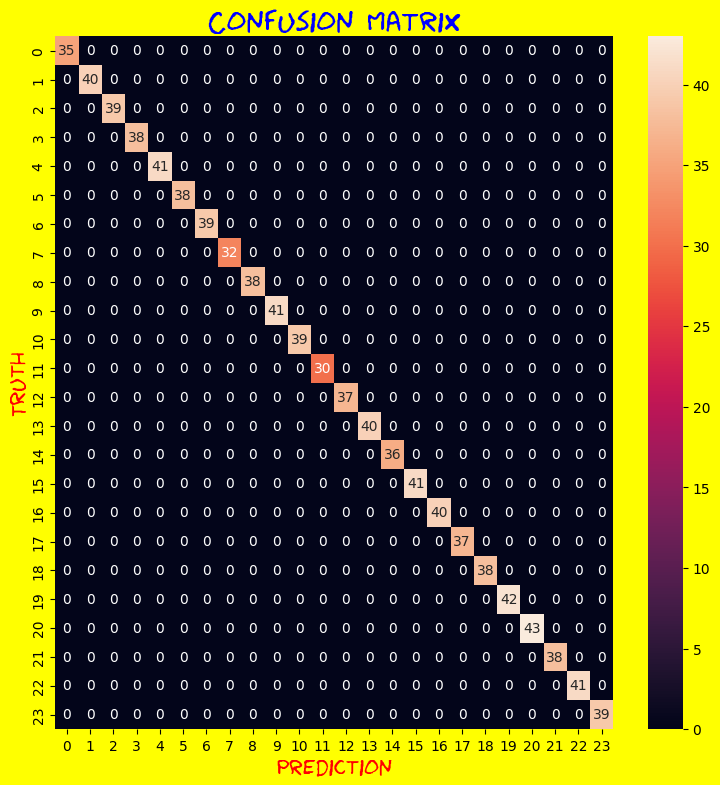

In [ ]:
cm = confusion_matrix(y_train , y_pred_gini_train)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Matrice de Confusion pour y_test**

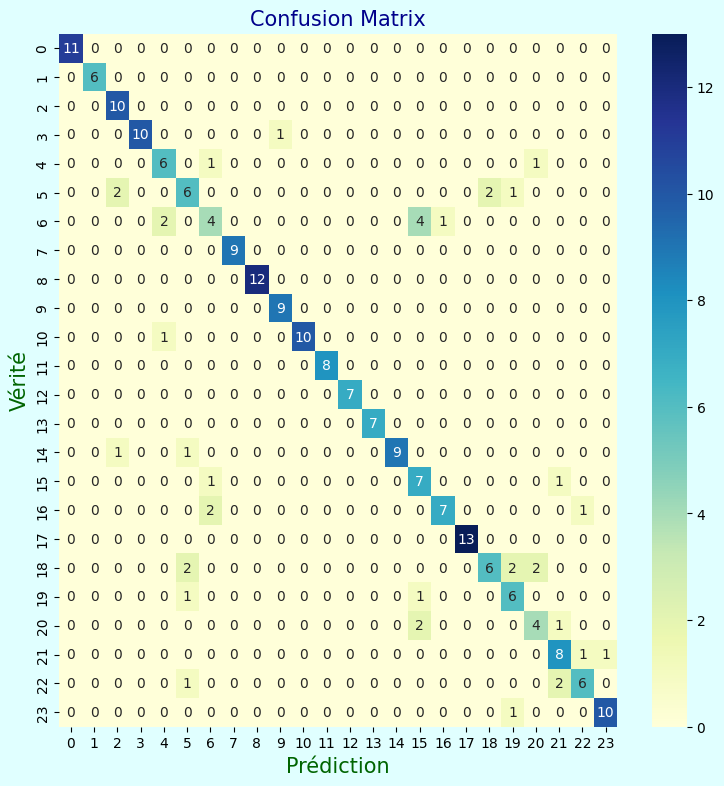

In [ ]:
cm11 = confusion_matrix(y_test, y_pred_gini_test)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()

#### **ML model: Random Forest**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(tfidf_train, y_train)

y_pred144 = rfc.predict(tfidf_train)

y_pred14 = rfc.predict(tfidf_test)

In [ ]:
RFCAcc1 = accuracy_score(y_train, y_pred144)
RFCAcc1

1.0

In [ ]:
RFCAcc = accuracy_score(y_test, y_pred14)
RFCAcc

0.961038961038961

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred14))




 Classification Report   :


                                   precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        11
                      Arthritis       1.00      1.00      1.00         6
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        11
                    Chicken pox       0.73      1.00      0.84         8
                    Common Cold       0.92      1.00      0.96        11
                         Dengue       1.00      0.73      0.84        11
          Dimorphic Hemorrhoids       1.00      1.00      1.00         9
               Fungal infection       1.00      1.00      1.00        12
                   Hypertension       0.90      1.00      0.95         9
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00         8
                

**Martice de Confusion pour y_train**

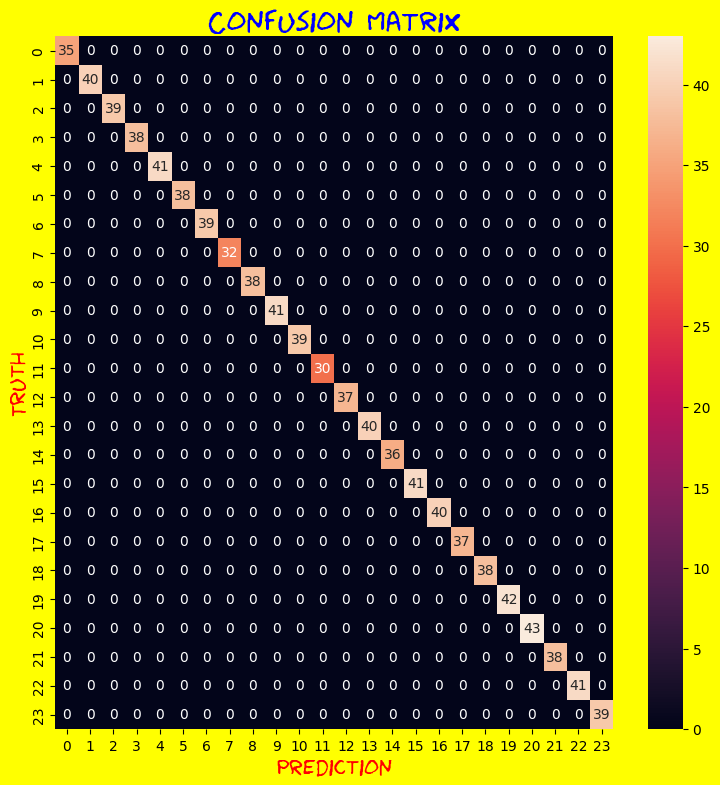

In [ ]:
cm = confusion_matrix(y_train , y_pred144)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Matrice de Confusion pour y_test**

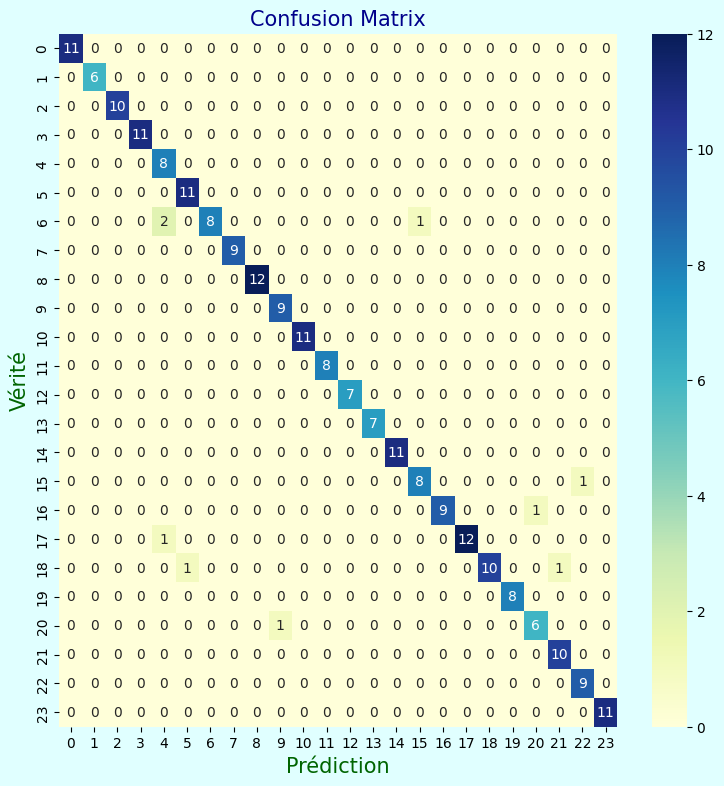

In [ ]:
cm11 = confusion_matrix(y_test, y_pred14)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()

In [ ]:
def make_pred(model,text):
    """Function to make prediction on single data instance"""
    text = review_to_words(text)
    tfidf = tfidf_vectorizer.transform([text]).toarray()
    disease = model.predict(tfidf)

    return disease[0]
symp1 = "I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches."
make_pred(rfc,symp1)

'Psoriasis'

### **Comparaison des Performances des Modèles 👀:**





In [ ]:
compare = pd.DataFrame({'Model': ['model' ,'knn_classifier' ,'dtc avec entropy', 'dtc avec gini','rfc' ],
                        'Accuracy': [SVCAcc*100, KNNAcc*100, ARDAcc*100 , ARDAcc11*100 ,RFCAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,rfc,96.103896
0,model,95.670996
1,knn_classifier,95.238095
3,dtc avec gini,82.683983
2,dtc avec entropy,69.264069


### **2- Extraction de caractéristiques à l'aide de TF-IDF Bigram :**

L'extraction de caractéristiques à l'aide de TF-IDF avec des bigrammes améliore la représentation textuelle en tenant compte des associations de mots consécutifs, enrichissant ainsi la compréhension du langage naturel pour des tâches telles que la classification.

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

In [ ]:
# Ajouter les vecteurs TF-IDF à votre DataFrame
df['vector1'] = df['text1'].apply(lambda text2: tfidf_vectorizer2.transform([text2]).toarray()[0])
df.head(10)

,label,text,text1,vector,label_num,vector1
0,Psoriasis,"I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.",experiencing skin rash arm leg torso past week red itchy covered dry scaly patch,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Psoriasis,"My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation.",skin peeling especially knee elbow scalp peeling often accompanied burning stinging sensation,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21931012337147654, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Psoriasis,"I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints.",experiencing joint pain finger wrist knee pain often achy throbbing get worse move joint,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3657701626149137, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Psoriasis,"There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them.",silver like dusting skin especially lower back scalp dusting made small scale flake easily scratch,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Psoriasis,"My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms.",nail small dent pit often feel inflammatory tender touch even minor rash arm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,Psoriasis,The skin on my palms and soles is thickened and has deep cracks. These cracks are painful and bleed easily.,skin palm sol thickened deep crack crack painful bleed easily,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,Psoriasis,"The skin around my mouth, nose, and eyes is red and inflamed. It is often itchy 

#### **ML model: SVM   avec bigram**

In [ ]:
model1 = SVC(C=1, kernel='poly', degree=3, gamma="scale")

model1.fit(tfidf_train_2, y_train)


y_pred21 = model1.predict(tfidf_train_2)

y_pred22 = model1.predict(tfidf_test_2)

In [ ]:
SVMAcc11 = accuracy_score(y_train, y_pred21)
SVMAcc11

1.0

In [ ]:
SVMAcc1 = accuracy_score(y_test, y_pred22)
SVMAcc1

0.8701298701298701

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred22))




 Classification Report   :


                                   precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        11
                      Arthritis       1.00      1.00      1.00         6
               Bronchial Asthma       0.91      1.00      0.95        10
           Cervical spondylosis       1.00      0.91      0.95        11
                    Chicken pox       0.73      1.00      0.84         8
                    Common Cold       1.00      1.00      1.00        11
                         Dengue       1.00      0.64      0.78        11
          Dimorphic Hemorrhoids       1.00      0.78      0.88         9
               Fungal infection       1.00      0.92      0.96        12
                   Hypertension       1.00      1.00      1.00         9
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00         8
                

**Matrice de Confusion pour y_train**

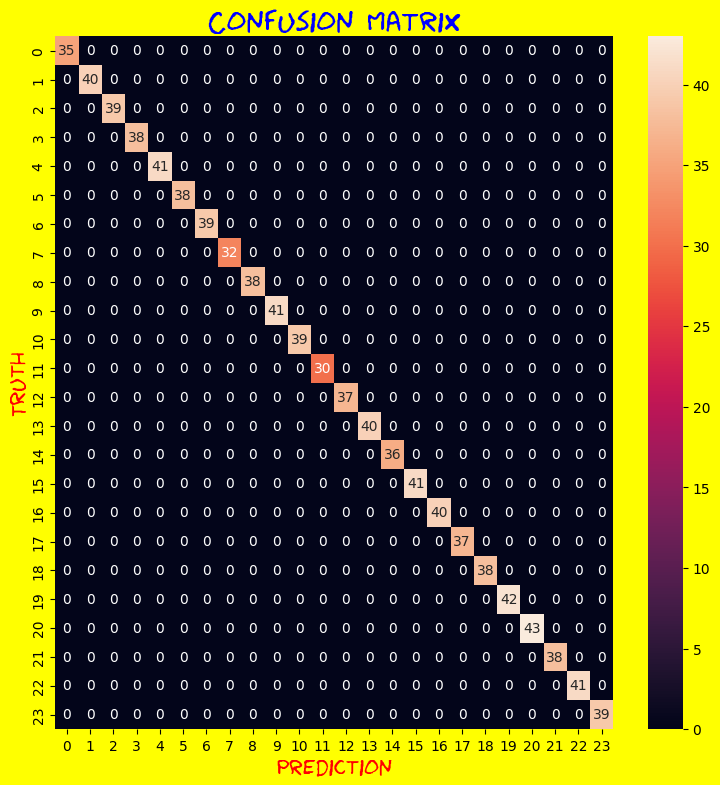

In [ ]:
cm = confusion_matrix(y_train , y_pred21)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Matrice de Confusion pour y_test**

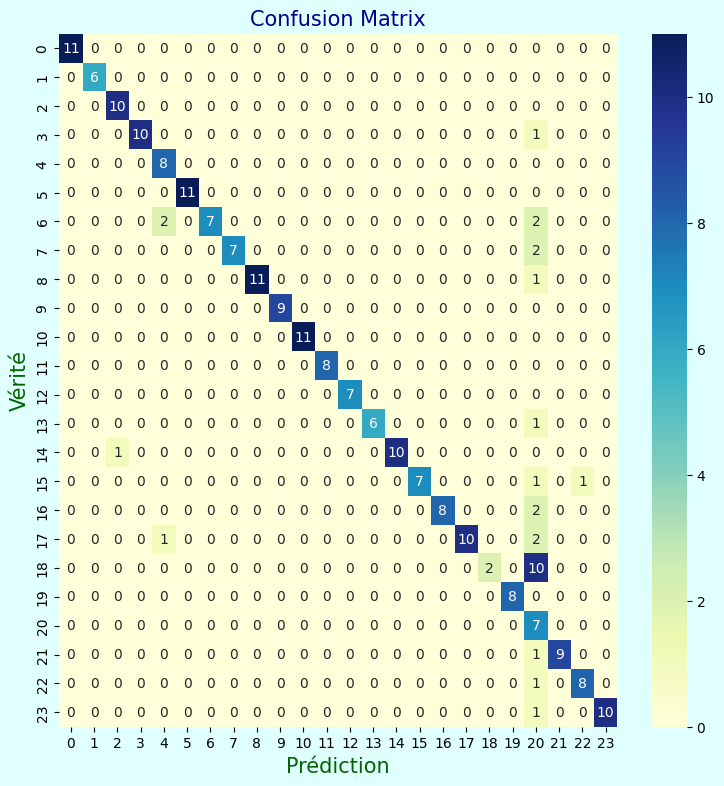

In [ ]:
cm11 = confusion_matrix(y_test, y_pred22)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()

**Fonction make_pred**

In [ ]:
def make_pred(model,text):
    """Function to make prediction on single data instance"""
    text = review_to_words(text)
    tfidf = tfidf_vectorizer2.transform([text]).toarray()
    disease = model.predict(tfidf)

    return disease[0]
symp1 = "I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches"

make_pred(model1,symp1)

'Psoriasis'

#### **ML model :knn avec bigram**

In [ ]:
# KNN Model Training

knn_classifier1 = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) based on your dataset
knn_classifier1.fit(tfidf_train_2, y_train)

y_pred23 = knn_classifier1.predict(tfidf_train_2)

y_pred24 = knn_classifier1.predict(tfidf_test_2)

In [ ]:
KNNAcc11 = accuracy_score(y_train, y_pred23)
KNNAcc11

0.9663774403470716

In [ ]:
KNNAcc11 = accuracy_score(y_test, y_pred24)
KNNAcc11

0.9090909090909091

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred22))




 Classification Report   :


                                   precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        11
                      Arthritis       1.00      1.00      1.00         6
               Bronchial Asthma       0.91      1.00      0.95        10
           Cervical spondylosis       1.00      0.91      0.95        11
                    Chicken pox       0.73      1.00      0.84         8
                    Common Cold       1.00      1.00      1.00        11
                         Dengue       1.00      0.64      0.78        11
          Dimorphic Hemorrhoids       1.00      0.78      0.88         9
               Fungal infection       1.00      0.92      0.96        12
                   Hypertension       1.00      1.00      1.00         9
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00         8
                

**Martice de Confusion de y_train**

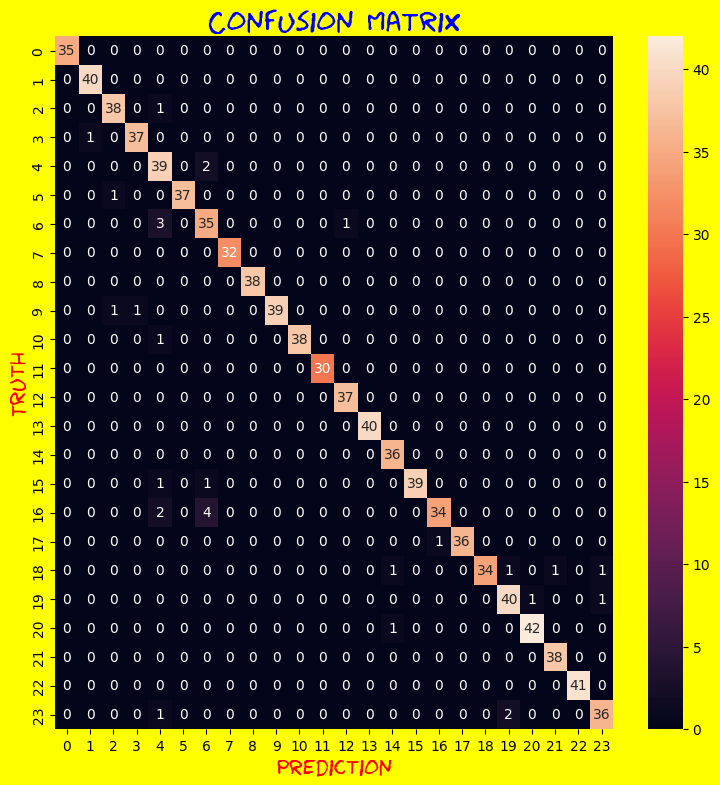

In [ ]:
cm = confusion_matrix(y_train,y_pred23)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Martice de Confusion pour y_test**

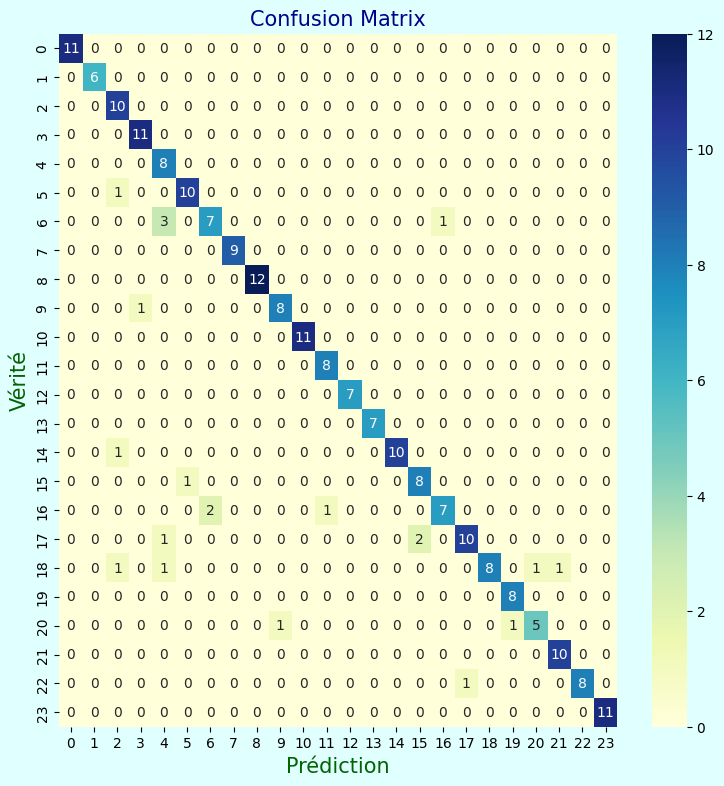

In [ ]:
cm11 = confusion_matrix(y_test, y_pred24)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()

#### **ML model: Arbre de décision avec Bigram**

In [ ]:
# Création du vecteuriseur TF-IDF avec des bigrammes
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train).toarray()
tfidf_test_2 = tfidf_vectorizer.transform(X_test).toarray()


**Arbre de décision avec gini**

In [ ]:
# Création du modèle DecisionTreeClassifier avec le critère gini
dtc_gini = DecisionTreeClassifier(criterion='gini')

# Entraînement du modèle
dtc_gini.fit(tfidf_train_2, y_train)

# Prédiction sur les données de train
y_pred166_gini_train = dtc_gini.predict(tfidf_train_2)

# Prédiction sur les données de test
y_pred16_gini_test = dtc_gini.predict(tfidf_test_2)

In [ ]:
ADAcc2= accuracy_score(y_train, y_pred166_gini_train)
ADAcc2

1.0

In [ ]:
# Évaluation du modèle
ADAcc21 = accuracy_score(y_test, y_pred16_gini_test)
ADAcc21

0.8008658008658008

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred16_gini_test))




 Classification Report   :


                                   precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        11
                      Arthritis       1.00      1.00      1.00         6
               Bronchial Asthma       0.83      1.00      0.91        10
           Cervical spondylosis       1.00      0.91      0.95        11
                    Chicken pox       0.50      0.75      0.60         8
                    Common Cold       0.70      0.64      0.67        11
                         Dengue       0.30      0.27      0.29        11
          Dimorphic Hemorrhoids       1.00      1.00      1.00         9
               Fungal infection       0.90      0.75      0.82        12
                   Hypertension       0.89      0.89      0.89         9
                       Impetigo       1.00      0.91      0.95        11
                       Jaundice       0.89      1.00      0.94         8
                

**Martice de Confusion pour Y_train**

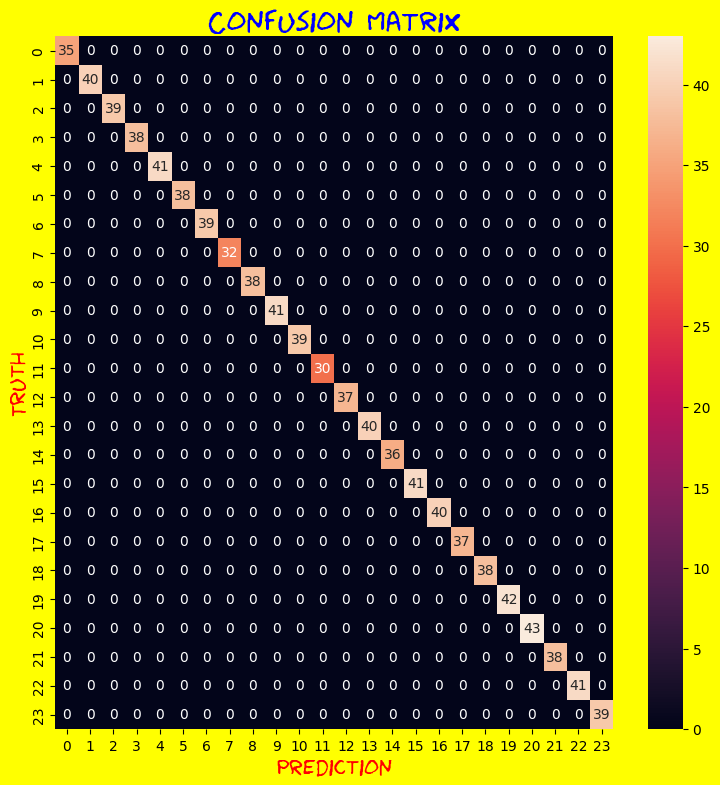

In [ ]:
cm = confusion_matrix(y_train,y_pred166_gini_train)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Martice de Confusion pour y_test**

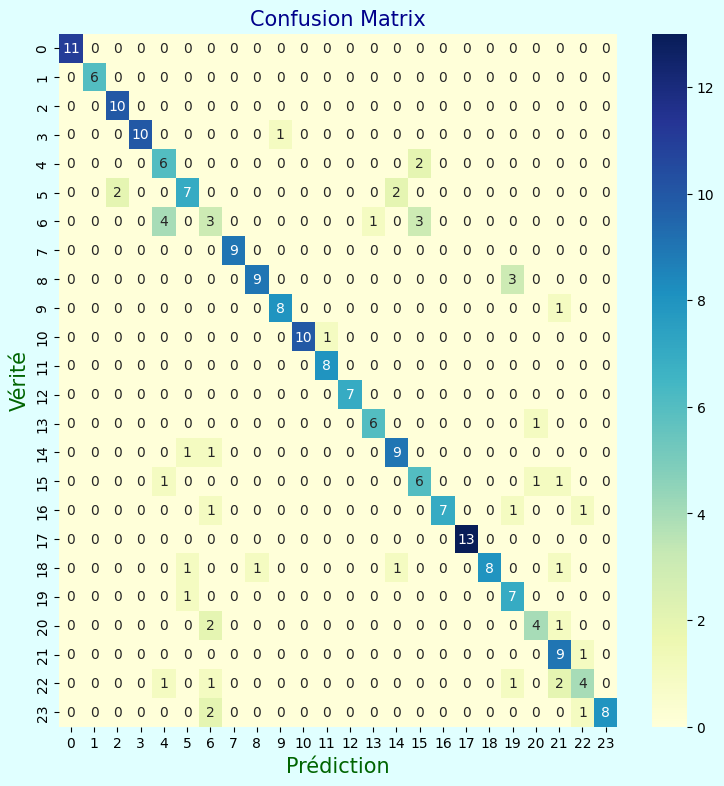

In [ ]:
cm11 = confusion_matrix(y_test,y_pred16_gini_test)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()

**Arbre de décision avec entropy**

In [ ]:
# Création du modèle DecisionTreeClassifier avec le critère entropy
dtc_entropy = DecisionTreeClassifier(criterion='entropy')

# Entraînement du modèle
dtc_entropy.fit(tfidf_train_2, y_train)

# Prédiction sur les données de train
y_pred166_entropy_train = dtc_entropy.predict(tfidf_train_2)

# Prédiction sur les données de test
y_pred16_entropy_test = dtc_entropy.predict(tfidf_test_2)

In [ ]:
# Évaluation du modèle
ADAcc3 = accuracy_score(y_train, y_pred166_entropy_train)
ADAcc3

1.0

In [ ]:
# Évaluation du modèle
ADAcc31 = accuracy_score(y_test, y_pred16_entropy_test)
ADAcc31

0.6666666666666666

**Martice de Confusion pour Y_train**

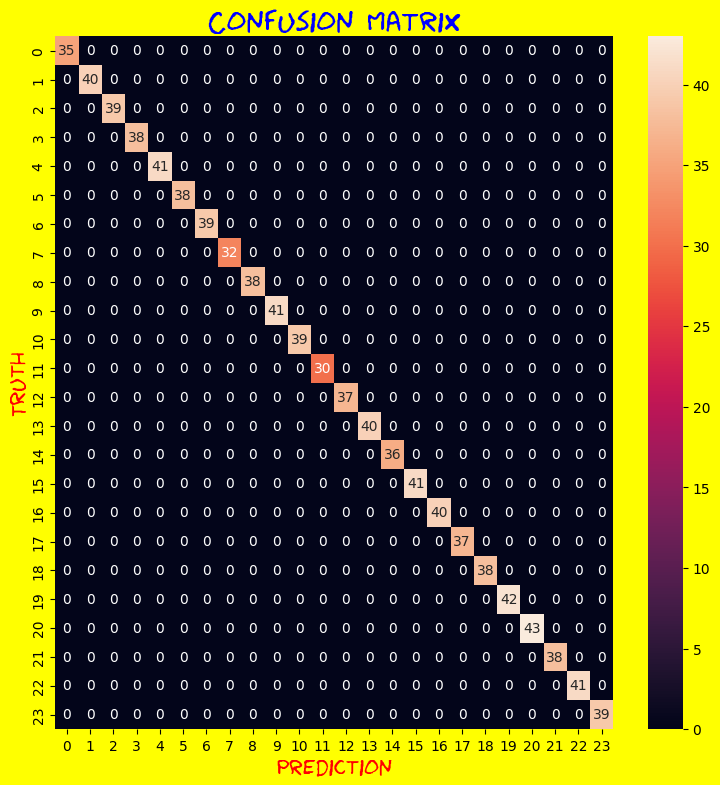

In [ ]:
cm = confusion_matrix(y_train,y_pred166_entropy_train)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Martice de Confusion pour Y_test**

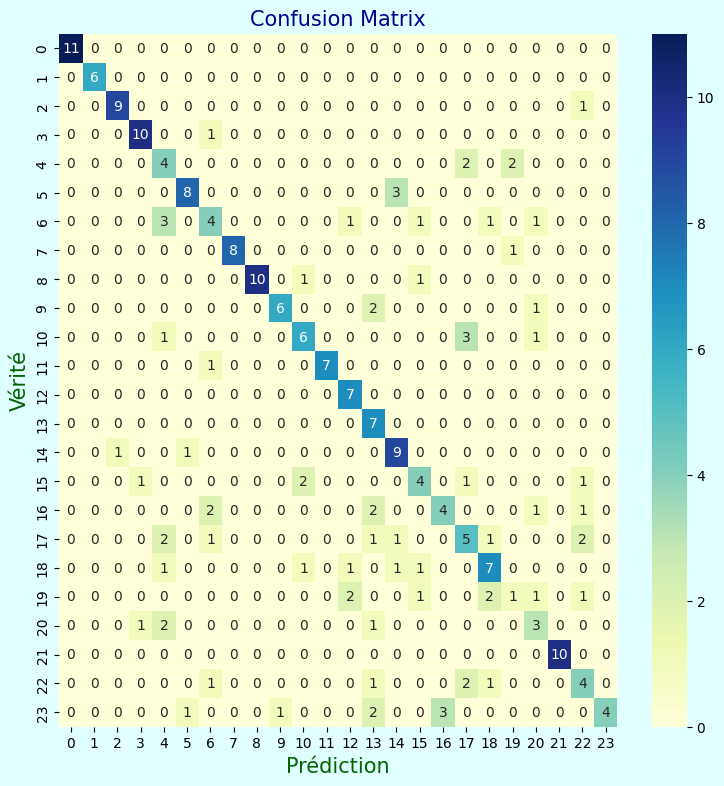

In [ ]:
cm11 = confusion_matrix(y_test,y_pred16_entropy_test)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()

#### **ML model: Random Forest avec Bigram**

In [ ]:
rfc1 = RandomForestClassifier(n_estimators = 100)
rfc1.fit(tfidf_train_2, y_train)

y_pred177 = rfc1.predict(tfidf_train_2)

y_pred17 = rfc1.predict(tfidf_test_2)

In [ ]:
RFCAcc2 = accuracy_score(y_train, y_pred177)
RFCAcc2

1.0

In [ ]:
RFCAcc21 = accuracy_score(y_test, y_pred17)
RFCAcc21

0.9437229437229437

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred17))




 Classification Report   :


                                   precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        11
                      Arthritis       1.00      1.00      1.00         6
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        11
                    Chicken pox       0.67      1.00      0.80         8
                    Common Cold       1.00      1.00      1.00        11
                         Dengue       0.88      0.64      0.74        11
          Dimorphic Hemorrhoids       1.00      1.00      1.00         9
               Fungal infection       1.00      1.00      1.00        12
                   Hypertension       0.90      1.00      0.95         9
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00         8
                

**Matrice de Confusion pour y_train**

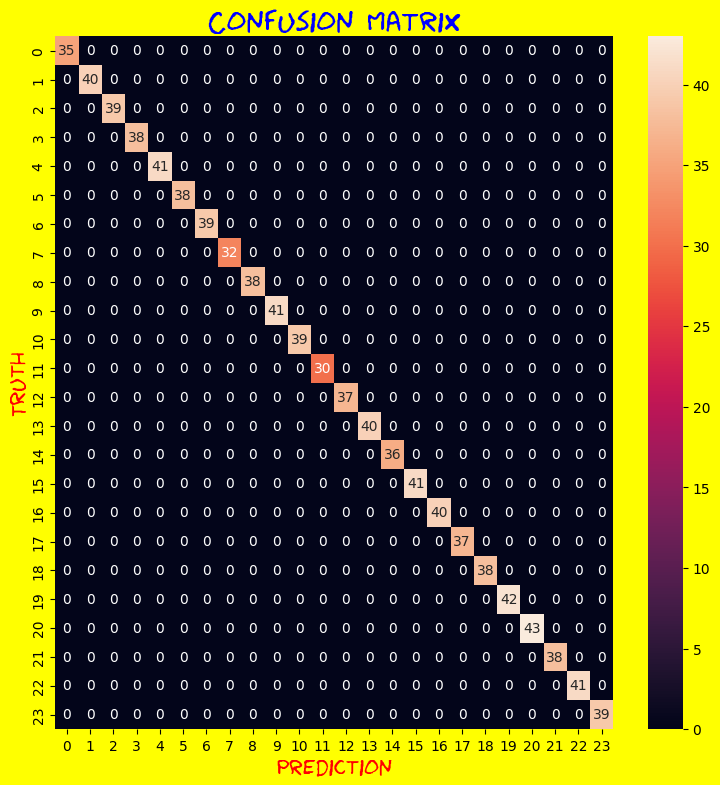

In [ ]:
cm = confusion_matrix(y_train,y_pred177)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Martice de Confusion pour y_test**

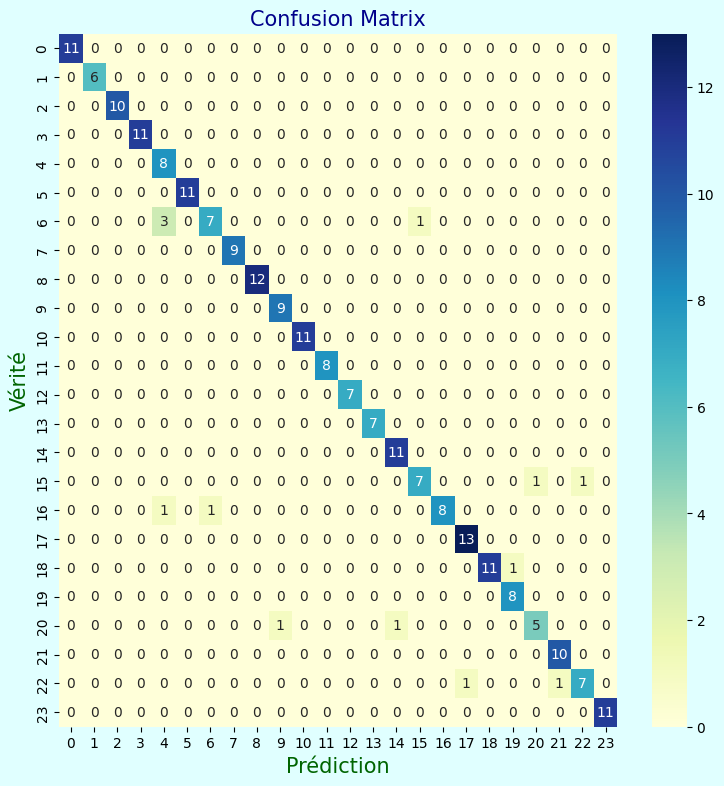

In [ ]:
cm11 = confusion_matrix(y_test, y_pred17)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()

### **Comparaison des Performances des Modèles 2 👀:**

In [ ]:
compare = pd.DataFrame({'Model': ['model1' ,'knn_classifier1','tdc avec entropy','tdc avec gini' , 'rfc1' ],
                        'Accuracy': [SVMAcc1*100, KNNAcc11*100, ADAcc21*100 ,ADAcc31*100, RFCAcc21*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,rfc1,94.372294
1,knn_classifier1,90.909091
0,model1,87.012987
2,tdc avec entropy,80.086580
3,tdc avec gini,66.666667


### **3-Extraction de caractéristiques à l'aide Bag of Words :**


In [ ]:
vectorizer = CountVectorizer()
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)


In [ ]:
# Ajouter les vecteurs TF-IDF à votre DataFrame
df['vector2'] = df['text1'].apply(lambda text2: count_vectorizer.transform([text2]).toarray()[0])
df.head(10)

 **ML model: SVM avec Bag of Words**

In [ ]:
# Créez et entraînez un modèle SVM
svm_model = SVC()
svm_model.fit(count_train, y_train)


# Faites des prédictions sur les données de train
y_pred31 = svm_model.predict(count_train)


# Faites des prédictions sur les données de test
y_pred32 = svm_model.predict(count_test)



In [ ]:
SVMAcc31 = accuracy_score(y_train, y_pred31)
SVMAcc31

0.9989154013015185

In [ ]:
SVMAcc32 = accuracy_score(y_test, y_pred32)
SVMAcc32

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred32))

**Martice de Confusion pour y_train**

In [ ]:
cm = confusion_matrix(y_train,y_pred31)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Martice de Confusion pour y_test**

In [ ]:
cm11 = confusion_matrix(y_test, y_pred32)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()

In [ ]:
def make_pred_bow(model, text, vectorizer):
    """Fonction pour effectuer une prédiction sur une seule instance de données avec Bag-of-Words."""
    # Prétraitement du texte (assurez-vous que review_to_words est défini)
    text_processed = review_to_words(text)

    # Vectorisation du texte avec le même vectorizer que celui utilisé lors de l'entraînement
    count_vectorizer= vectorizer.transform([text_processed]).toarray()

    # Prédiction avec le modèle
    disease = model.predict(count_vectorizer)

    return disease[0]

# Exemple d'utilisation avec le modèle SVM et le vectorizer utilisé précédemment
symp1 = "I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches"
predicted_disease = make_pred_bow(svm_model, symp1, count_vectorizer)
print("Predicted Disease:", predicted_disease)


Predicted Disease: Psoriasis


#### **Model ML : KNN avec Bag of Words**

In [ ]:
# Création du modèle KNeighborsClassifier
knn_classifier2 = KNeighborsClassifier(n_neighbors=3)

# Entraînement du modèle
knn_classifier2.fit(count_train, y_train)

# Prédiction sur les données de test
y_pred33 = knn_classifier2.predict(count_train)

# Prédiction sur les données de test
y_pred34 = knn_classifier2.predict(count_test)


In [ ]:
# Évaluation du modèle
KNNAcc2 = accuracy_score(y_train, y_pred33)
KNNAcc2

0.9631236442516269

In [ ]:
# Évaluation du modèle
KNNAcc21 = accuracy_score(y_test, y_pred34)
KNNAcc21

0.8744588744588745

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred34))




 Classification Report   :


                                   precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        11
                      Arthritis       1.00      1.00      1.00         6
               Bronchial Asthma       0.91      1.00      0.95        10
           Cervical spondylosis       1.00      1.00      1.00        11
                    Chicken pox       0.42      1.00      0.59         8
                    Common Cold       1.00      0.82      0.90        11
                         Dengue       0.64      0.64      0.64        11
          Dimorphic Hemorrhoids       1.00      1.00      1.00         9
               Fungal infection       1.00      0.92      0.96        12
                   Hypertension       0.90      1.00      0.95         9
                       Impetigo       1.00      0.91      0.95        11
                       Jaundice       1.00      1.00      1.00         8
                

**Martice de Confusion pour y_train**

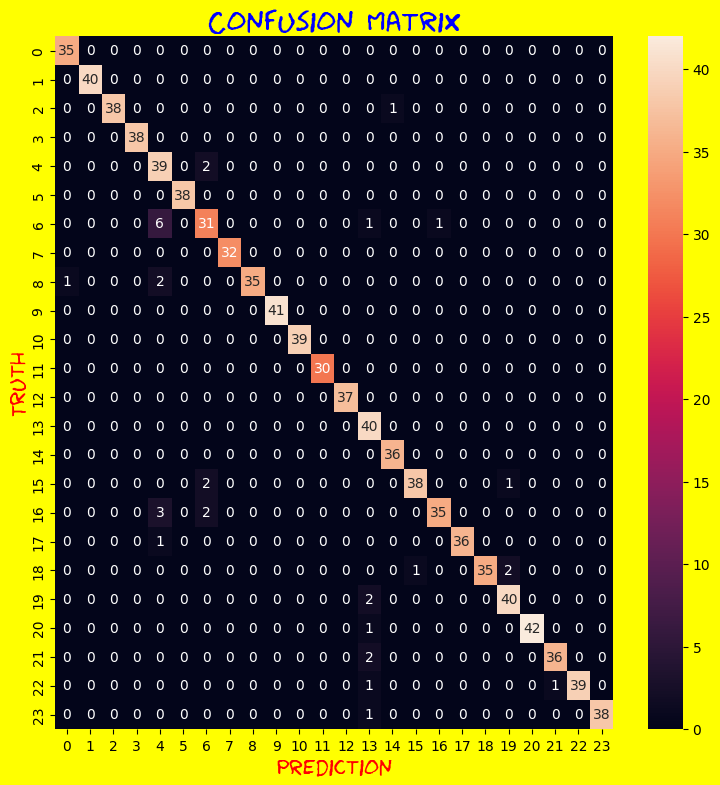

In [ ]:
cm = confusion_matrix(y_train,y_pred33)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Martice de Confusion pour y_test**

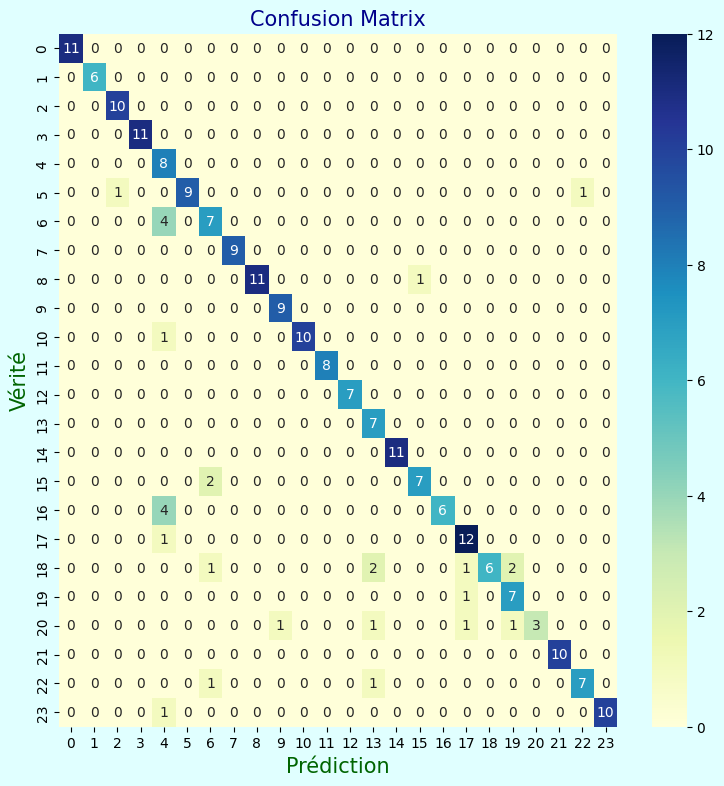

In [ ]:
cm11 = confusion_matrix(y_test, y_pred34)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

plt.show()

#### **ML model: Arbre de décision avec Bag of Words**

**Arbre de décision avec entropy**

In [ ]:
dtc2 = DecisionTreeClassifier(criterion='entropy')

# Fit the model
dtc2.fit(count_train, y_train)

# Predictions on training data
y_pred35_entropy_train = dtc2.predict(count_train)

# Predictions on test data
y_pred36_entropy_test = dtc2.predict(count_test)


In [ ]:
# Évaluation du modèle
ADAcc2 = accuracy_score(y_train, y_pred35_entropy_train)
ADAcc2

1.0

In [ ]:
# Évaluation du modèle
ADAcc21 = accuracy_score(y_test, y_pred36_entropy_test)
ADAcc21

0.7878787878787878

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred36_entropy_test))

**Martice de Confusion pour y_train**

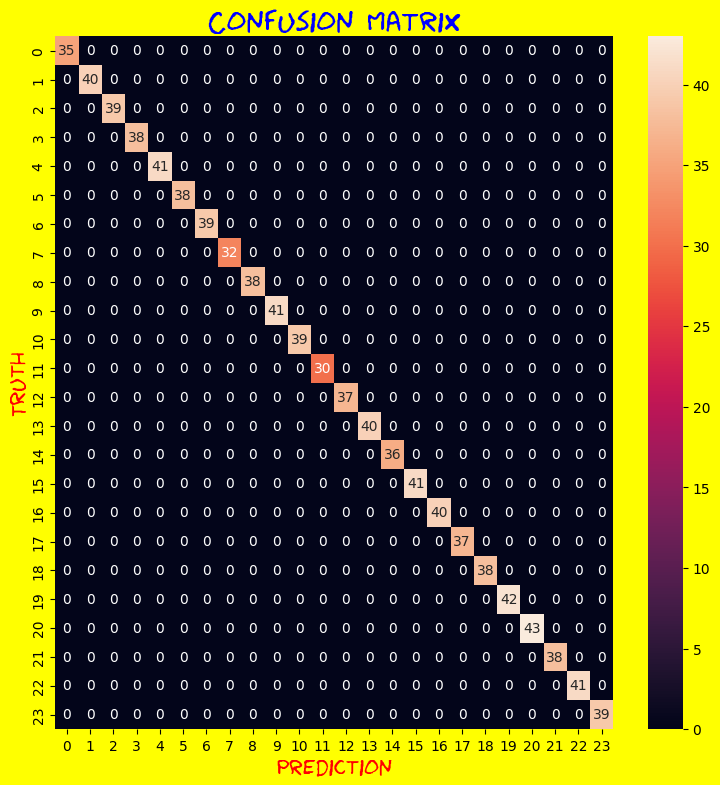

In [ ]:
cm = confusion_matrix(y_train,y_pred35_entropy_train)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Matrice de Confusion pour y_test**

Text(0.5, 1.0, 'Confusion Matrix')

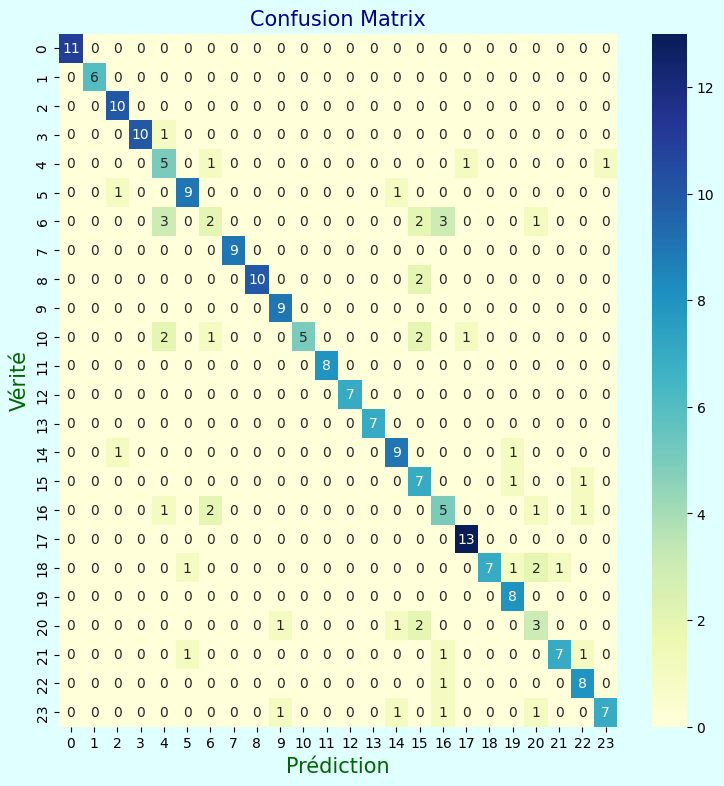

In [ ]:
cm11 = confusion_matrix(y_test, y_pred36_entropy_test)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

**Arbre de décision avec gini**

In [ ]:
dtc2_gain = DecisionTreeClassifier(criterion='gini')

# Fit the model
dtc2_gain.fit(count_train, y_train)

# Predictions on training data
y_pred35_gini_train = dtc2_gain.predict(count_train)

# Predictions on test data
y_pred36_gini_test = dtc2_gain.predict(count_test)


In [ ]:
# Évaluation du modèle
ADAcc3 = accuracy_score(y_train, y_pred35_gini_train)
ADAcc3

1.0

In [ ]:
# Évaluation du modèle
ADAcc31 = accuracy_score(y_test, y_pred36_gini_test)
ADAcc31

0.8441558441558441

**Martice de Confusion pour y_train**

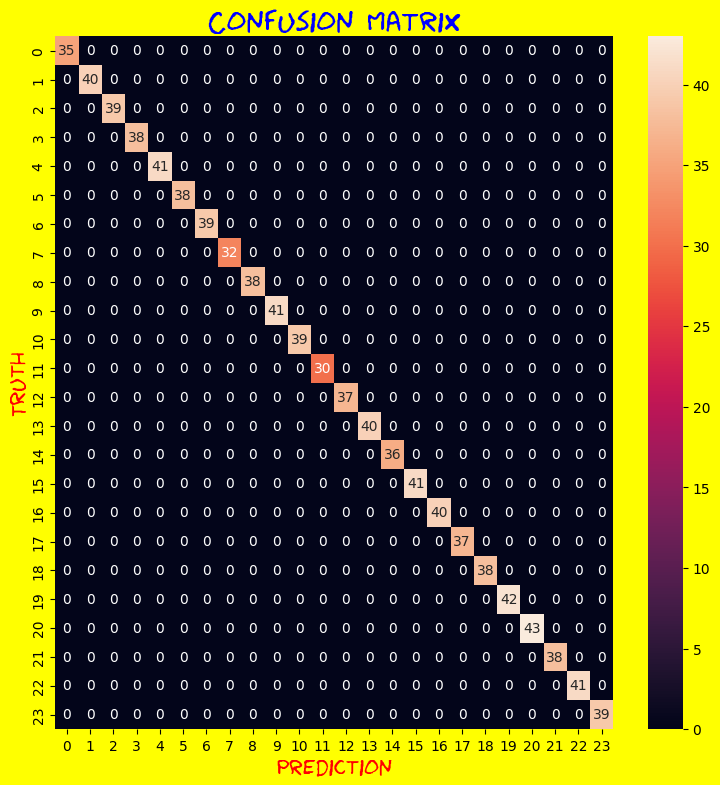

In [ ]:
cm = confusion_matrix(y_train,y_pred35_gini_train)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Matrice de Confusion pour y_test**

Text(0.5, 1.0, 'Confusion Matrix')

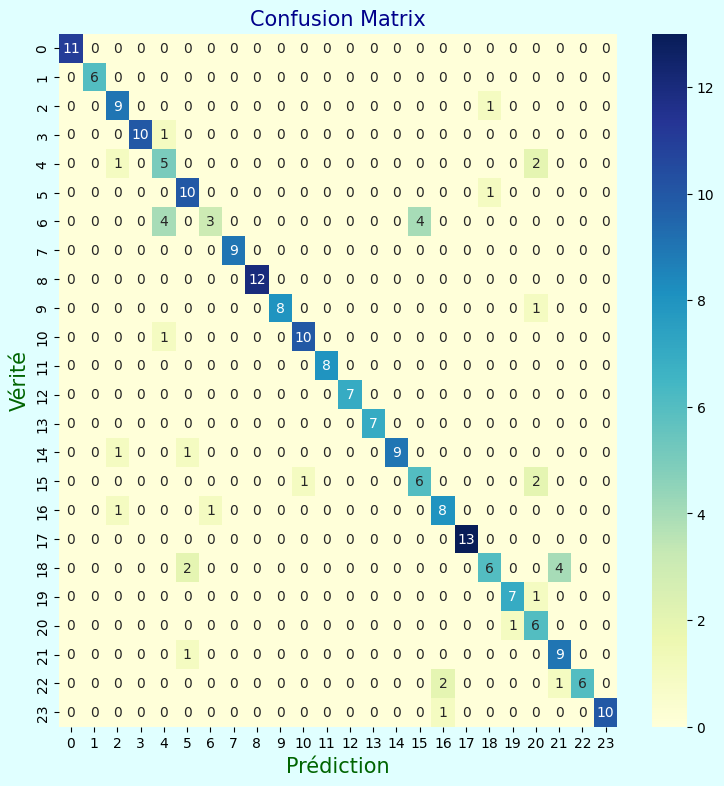

In [ ]:
cm11 = confusion_matrix(y_test, y_pred36_gini_test)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

#### **Model ML: RFC avec Bag of Words**

In [ ]:
rfc3 = RandomForestClassifier(n_estimators = 100)
rfc3.fit(count_train, y_train)

y_pred38 = rfc3.predict(count_train)

y_pred39 = rfc3.predict(count_test)

In [ ]:
# Évaluation du modèle
RFCAcc3 = accuracy_score(y_train, y_pred38)
RFCAcc3

1.0

In [ ]:
# Évaluation du modèle
RFCAcc31 = accuracy_score(y_test, y_pred39)
RFCAcc31

0.961038961038961

In [ ]:
print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred39))




 Classification Report   :


                                   precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        11
                      Arthritis       1.00      1.00      1.00         6
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        11
                    Chicken pox       0.80      1.00      0.89         8
                    Common Cold       0.92      1.00      0.96        11
                         Dengue       0.90      0.82      0.86        11
          Dimorphic Hemorrhoids       1.00      1.00      1.00         9
               Fungal infection       1.00      1.00      1.00        12
                   Hypertension       1.00      1.00      1.00         9
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00         8
                

**Matrice de Confusion pour y_train**

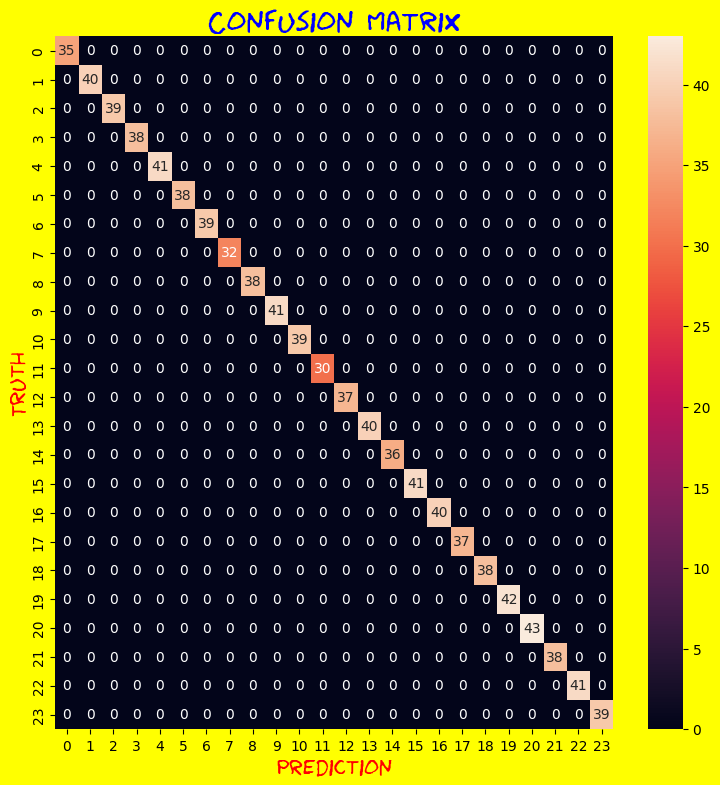

In [ ]:
cm = confusion_matrix(y_train,y_pred38)
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

**Matrice de Confusion pour y_test**

Text(0.5, 1.0, 'Confusion Matrix')

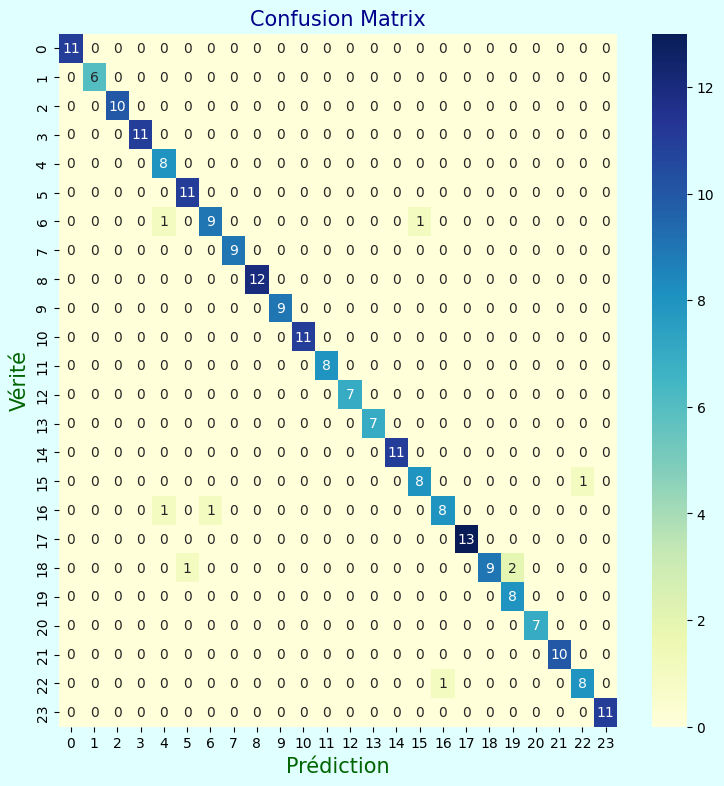

In [ ]:
cm11 = confusion_matrix(y_test, y_pred39)
font = {'family': 'sans-serif', 'color': 'darkgreen', 'size': 20}

plt.figure(figsize=(9, 9), facecolor='lightcyan', edgecolor='darkgreen')
heatmap = sn.heatmap(cm11, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation d'une colormap différente
plt.xlabel('Prédiction', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.ylabel('Vérité', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 15})
plt.title('Matrice de Confusion - Modèle 11', fontdict={'family': 'sans-serif', 'color': 'darkgreen', 'size': 20})

# Ajout d'un titre supplémentaire au-dessus de la colormap
heatmap.set_title('Confusion Matrix', fontdict={'family': 'sans-serif', 'color': 'darkblue', 'size': 15})

### **Comparaison des Performances des Modèles 3 👀:**

In [ ]:
compare = pd.DataFrame({'Model': ['svm_model' ,'knn_classifier2' ,'dtc avec entropy' ,'dtc avec gini','rfc3' ],
                        'Accuracy': [SVMAcc32*100, KNNAcc21*100, ADAcc21*100 ,ADAcc31*100,RFCAcc31*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,rfc3,96.103896
0,svm_model,94.372294
1,knn_classifier2,87.445887
3,dtc avec gini,84.415584
2,dtc avec entropy,78.787879
